In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Generating synthetic regression data using sklearn's make_regression
X, y = make_regression(n_samples=20000, n_features=1, noise=2000, random_state=42)

In [4]:
X

array([[-0.71551277],
       [-1.08141338],
       [-0.82393549],
       ...,
       [ 2.45236991],
       [-0.13833528],
       [-0.97012426]])

In [5]:
y

array([3392.26126474,  -19.78142885, 1701.54918255, ..., 1182.37312193,
        643.44729617, 1337.80009863])

In [13]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
X_train

array([[ 0.15974002],
       [ 0.3803657 ],
       [ 0.45341602],
       ...,
       [-0.99025499],
       [ 0.74715482],
       [ 1.15097589]])

In [20]:
# Initializing and training the SVR model
svr_model = SVR(kernel='poly', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

SVR(kernel='poly')

In [21]:
# Making predictions on the test set
y_pred = svr_model.predict(X_test)

In [22]:
# Calculating Mean Squared Error
mse_sklearn_data = mean_squared_error(y_test, y_pred)

In [23]:
mse_sklearn_data

np.float64(3935239.9064932666)

In [24]:
r2_score(y_pred,y_test)

-792903.6153572003

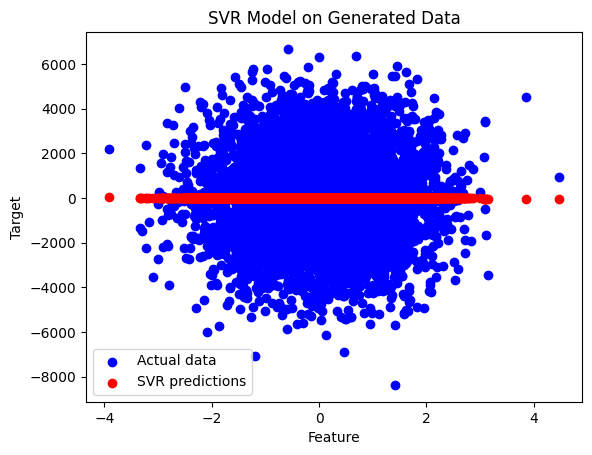

In [25]:
# Plotting the results
plt.scatter(X_test, y_test, color="blue", label="Actual data")
plt.scatter(X_test, y_pred, color="red", label="SVR predictions")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("SVR Model on Generated Data")
plt.legend()
plt.show()